
- Student name: Nadine Amersi-Belton
- Student pace: Part-time 
- Scheduled project review date/time: TBC
- Instructor name: TBC
- Blog post URL: TBC

# Predicting House Prices in King County

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Our-Approach" data-toc-modified-id="Our-Approach-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Our Approach</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Methodology</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Investigate-Data-Types" data-toc-modified-id="Investigate-Data-Types-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Investigate Data Types</a></span></li><li><span><a href="#Dealing-with-null-values" data-toc-modified-id="Dealing-with-null-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dealing with null values</a></span></li><li><span><a href="#Check-duplicates" data-toc-modified-id="Check-duplicates-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Check duplicates</a></span></li><li><span><a href="#Initial-feature-engineering" data-toc-modified-id="Initial-feature-engineering-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Initial feature engineering</a></span></li></ul></li><li><span><a href="#Explore-data" data-toc-modified-id="Explore-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore data</a></span><ul class="toc-item"><li><span><a href="#Initial-visualisations" data-toc-modified-id="Initial-visualisations-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Initial visualisations</a></span></li><li><span><a href="#Q1:-Best-time-of-year-to-sell" data-toc-modified-id="Q1:-Best-time-of-year-to-sell-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Q1: Best time of year to sell</a></span></li></ul></li></ul></div>

## Introduction

### Problem Statement

In April 2020, estate agent ABC commisions a research project investigating house sales in King County to help shape a future targeted campaign.

The project seeks to provide data-driven insights into the factors which influence the house price and presents a linear regression model which can accurately predict the sale price of a house in the area.

### Our Approach

### Data

A dataset has been provided and can be found in the `kc_house_data.csv` file in this repository.

The column names and descriptions as provided can be found in the `column_names.md` file in this repository. For convenience they have been reproduced below.

**Column Names and descriptions for Kings County Data Set**
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


### Methodology

## Data Cleaning

Let us begin by importing the necessary libraries.

In [1]:
# Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

Let us read in our dataset using Pandas and create a DataFrame.

In [2]:
# Read data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Investigate Data Types

In [3]:
# Summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


We note that 
- `date` should be changed to a `DateTime` object
- `sqft_basement` should be of type `float`
- `yr_renovated` should be of type `int`

In [4]:
# Investigate date column 
df['date'].value_counts()

6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
2/15/2015      1
5/27/2015      1
3/8/2015       1
1/31/2015      1
8/30/2014      1
Name: date, Length: 372, dtype: int64

In [5]:
# Convert date column to DateTime
df['date'] = pd.to_datetime(df['date'])

In [6]:
# Investigate sqft_basement column
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2580.0        1
2300.0        1
176.0         1
1920.0        1
143.0         1
Name: sqft_basement, Length: 304, dtype: int64

There is a significant number of entries with `?` as value for `sqft_basement`. Also we note that more than half of entries have a value of `0` indicating there isn't a basement. For now, let us replace the `?` with the mode, namely `0`. 

Later we may further transform this feature into a categorical variable with value 1 if the house has a basement and 0 if not.

In [7]:
# Replace ? with 0 in sqft_basement and change to float
df['sqft_basement'] = df['sqft_basement'].map(lambda x : float(x.replace('?', '0')))

In [8]:
# Convert yr_renovated to int
df['date'] = pd.to_datetime(df['date'])

All data types now appear correct.

### Dealing with null values

Let us investigate missing values and find suitable replacements.

In [9]:
# Get number of missing values in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We will need to further investigate `waterfront`, `view` and `year_renovated` features.

In [10]:
# Get value counts for feature waterfront.
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

From the data dictionnary, we note that the feature `waterfront` is a categorical variable, with value 1 if the house has a view to a waterfront and 0 otherwise.

In [11]:
# Get percentage of missing values
percent_missing = df['waterfront'].isnull().sum() * 100 / len(df)
percent_missing

11.00152798999861

In [12]:
# Get statistics for waterfront
df['waterfront'].describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

Based on the statistics,  it makes sense to fill the missing values with 0.

In [13]:
df['waterfront'] = df['waterfront'].fillna(0)

In [14]:
# Get value counts for feature view.
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

From the data dictionnary, we note that `view` relates to whether the house has been viewed and presumably how many times.

In [15]:
# Get percentage of missing values
percent_missing = df['view'].isnull().sum() * 100 / len(df)
percent_missing

0.29170718155299347

The percentage missing is very small. We will fill the missing values with 0.

In [16]:
df['view'] = df['view'].fillna(0)

In [17]:
# Get value counts for feature yr renovated.
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [18]:
# Get percentage of missing values
percent_missing = df['yr_renovated'].isnull().sum() * 100 / len(df)
percent_missing

17.78950780200954

Again we will fill the missing values with 0. 

Later we may further transform this feature into a categorical variable with value 1 if the house has been renovated and 0 if not.

In [19]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [20]:
# Check all missing values have been replaced
df.isna().any().any()

False

### Check duplicates

Let us check whether we have any duplicates in our dataset.

In [21]:
# Cheking for duplicated rows
duplicates = df[df.duplicated()]
print(len(duplicates))

0


There are no completely identical rows in our dataset.

In [22]:
# Cheking for rows with same id
duplicates = df[df.duplicated(subset=['id'])]
print(len(duplicates))

177


We note that there are multiple entries with same `id`. This would be due to the fact that a house may have been sold twice and thus have two entries. However as we are only looking at two years worth of data it is still surprising to see such a high figure. 

For now we will keep entries and allow the model to treat them as seperate data points.

### Initial feature engineering

As one of the questions we seek to answer relates to the best time of the year to sell, let us extract month of sale from the `date` variable.

In [23]:
# Define sale_month feature
df['sale_month'] = pd.DatetimeIndex(df['date']).month

In the case of renovations, let us create a new feature `was_renovated` which has value `1` if the house was renovated and `0` otherwise

In [24]:
df['was_renovated'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)

As we saw that `sqft_basement` had mostly 0 values, indicating no basement, let us create a new feature `has_basement` which has value `1` if the house has a basement and `0` otherwise.

In [25]:
df['has_basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)

## Explore data

### Initial visualisations

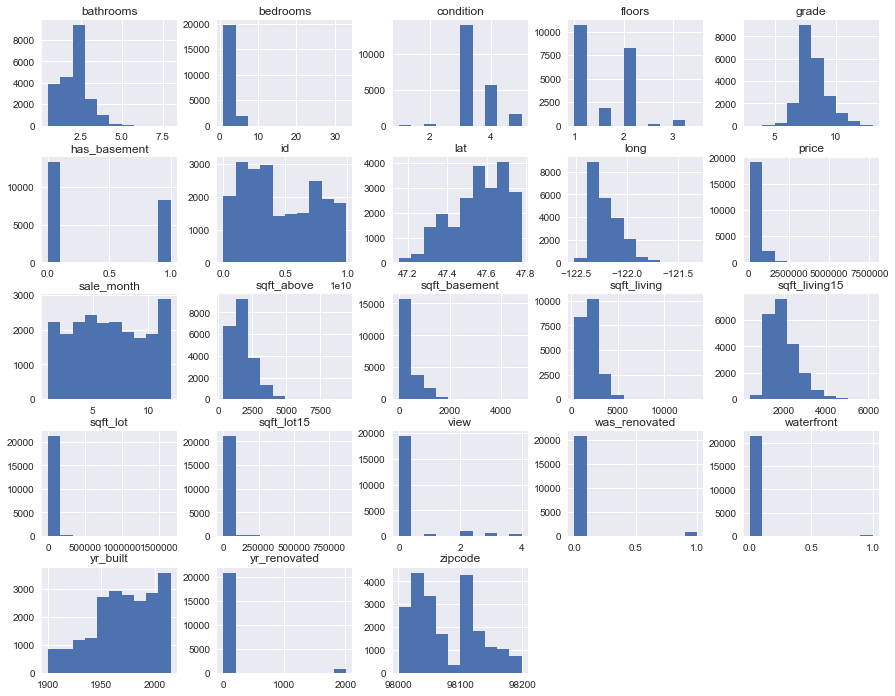

In [26]:
# Plot all distributions
df.hist(figsize = (15,12))
plt.show()

### Q1: Best time of year to sell

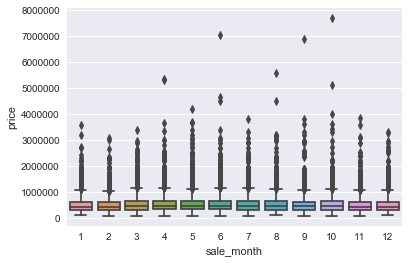

In [32]:
sns.boxplot(x = df['sale_month'], y = df['price'], data = df)
plt.show()

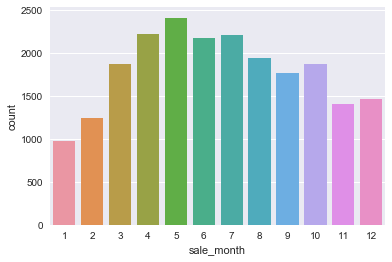

In [47]:
sns.countplot(x = df['sale_month'], data = df)
plt.show()